# OSEMN Model (2): Scrub

# Consolidating the Data

Consolidate kaggle data and additional data that were gathered from APIs and webscraping.

In [1]:
import pandas as pd

In [271]:
# kaggle data
kg_df = pd.read_csv('Data/clickbait_data.csv')

# additional data from APIs and webscraping
ch_df1 = pd.read_csv('Data/clickhole_lifestyle.csv')
ch_df2 = pd.read_csv('Data/clickhole_news.csv')
wt_df = pd.read_csv('Data/worldtruth_headlines.csv')
nyt_df1 = pd.read_csv('Data/nyt_jan_2021.csv')
nyt_df2 = pd.read_csv('Data/nyt_jul_2020.csv')
gu_df = pd.read_csv('Data/guardian_oct_2020.csv')

ch_df = pd.concat([ch_df1, ch_df2])
nyt_df = pd.concat([nyt_df1, nyt_df2])

In [311]:
# consolidate additional data
def consolidate_data(DataFrame_list, is_clickbait):
    for i in range(len(is_clickbait)):
        DataFrame_list[i].rename(columns={'0': 'headline', 'Unnamed: 0': "clickbait"}, inplace=True)
        DataFrame_list[i]['clickbait'] = is_clickbait[i]
    return DataFrame_list

In [322]:
data_list = consolidate_data([ch_df, wt_df, nyt_df, gu_df], [1, 1, 0, 0])

# combine additional data with kaggle data
data_list.append(kg_df)
data = pd.concat(data_list, sort=True)

In [324]:
# check class imbalance
data['clickbait'].value_counts(normalize=True)

1    0.500344
0    0.499656
Name: clickbait, dtype: float64

# Pre-processing Text

Pre-processing using Natural Language Processing:
- Check for null values
- Tokenize
- Check for encoding or special words
- Flatten into a single list of words
- Remove stopwords
- Separate numeric characters and non-numeric characters
- Lemmatize non-numeric list of words

In [361]:
data.isna().sum()

clickbait    0
headline     1
dtype: int64

In [368]:
null_index = data[pd.isnull(data['headline'])].index
data.drop(index=null_index, inplace=True)

In [373]:
data.reset_index(drop=True, inplace=True)

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [388]:
tokenized_data = data

In [389]:
tokenized_data['headline'] = data.apply(lambda x: x['headline'].lower(), axis=1)

In [390]:
tokenized_data

,clickbait,headline
0,1,"5 magical cyber gems that, when printed out an..."
1,1,with great art comes great sacrifice: 5 times ...
2,1,the fact that these animals have killed people...
3,1,"come and git it, boys! 6 hunky ranch hands who..."
4,1,prioritizing self-care: this woman is enjoying...
...,...,...
65361,0,"to make female hearts flutter in iraq, throw a..."
65362,0,"british liberal democrat patsy calton, 56, die..."
65363,0,drone smartphone app to help heart attack vict...
65364,0,"netanyahu urges pope benedict, in israel, to d..."


In [391]:
tokenized_data['tokenized'] = tokenized_data.apply(lambda row: tokenizer.tokenize(row['headline']), axis=1)

In [392]:
tokenized_data

,clickbait,headline,tokenized
0,1,"5 magical cyber gems that, when printed out an...","[5, magical, cyber, gems, that, when, printed,..."
1,1,with great art comes great sacrifice: 5 times ...,"[with, great, art, comes, great, sacrifice, 5,..."
2,1,the fact that these animals have killed people...,"[the, fact, that, these, animals, have, killed..."
3,1,"come and git it, boys! 6 hunky ranch hands who...","[come, and, git, it, boys, 6, hunky, ranch, ha..."
4,1,prioritizing self-care: this woman is enjoying...,"[prioritizing, self, care, this, woman, is, en..."
...,...,...,...
65361,0,"to make female hearts flutter in iraq, throw a...","[to, make, female, hearts, flutter, in, iraq, ..."
65362,0,"british liberal democrat patsy calton, 56, die...","[british, liberal, democrat, patsy, calton, 56..."
65363,0,drone smartphone app to help heart attack vict...,"[drone, smartphone, app, to, help, heart, atta..."
65364,0,"netanyahu urges pope benedict, in israel, to d...","[netanyahu, urges, pope, benedict, in, israel,..."


In [437]:
special_character = []
for i in tokenized_data['tokenized']:
    for j in i:
        if j.isalpha():
            pass
        else:
            try:
                int(j)
            except:
                special_character.append(j)
specialset = set(special_character)

# confirmed that there are no strange words (i.e. encoding)

In [351]:
# tokenized_data = tokenized_data.apply(lambda x: tokenizer.tokenize(x['headline']))

# tokenized_data = data
# for i in range(len(data)):
#     tokenized_data['headline'][i] = tokenizer.tokenize(data['headline'][i])

KeyError: ('headline', 'occurred at index clickbait')

In [134]:
firstwords = [tokenized_data['headline'][i][0] for i in range(len(tokenized_data))]
firstwords

['should',
 'which',
 'the',
 'this',
 'a',
 'how',
 '32',
 'if',
 'what',
 'natalie',
 '16',
 '21',
 '17',
 'does',
 'who',
 '17',
 'are',
 'the',
 'here',
 '15',
 'what',
 'zoo',
 'tell',
 '9',
 '21',
 'this',
 '8',
 'another',
 '16',
 'this',
 'when',
 'an',
 'sarah',
 'which',
 'a',
 '29',
 '13',
 'we',
 '23',
 'we',
 'grimes',
 'this',
 'the',
 '17',
 'how',
 'we',
 'guys',
 '22',
 'the',
 'this',
 'here',
 'ed',
 'what',
 'take',
 'are',
 '18',
 '27',
 'how',
 'which',
 '25',
 'literally',
 '58',
 '17',
 'do',
 'which',
 '29',
 'this',
 'request',
 'issa',
 'how',
 'you',
 'no',
 'this',
 '18',
 'we',
 'charli',
 'if',
 '13',
 'will',
 '28',
 '19',
 'here',
 'this',
 'i',
 '24',
 'country',
 '17',
 'the',
 'this',
 '42',
 'this',
 '22',
 'are',
 'which',
 'how',
 'how',
 '12',
 'what',
 '23',
 'there',
 'we',
 '17',
 'here',
 'can',
 '21',
 'which',
 'anna',
 'people',
 'are',
 'do',
 'we',
 '21',
 'a',
 'be',
 'we',
 '18',
 '19',
 '20',
 '21',
 'will',
 'mark',
 'nobody',
 'are'

In [135]:
# Find frequency of each word in a string in Python 
# using dictionary. 
   
def count(elements): 
    # check if each word has '.' at its last. If so then ignore '.' 
    if elements[-1] == '.': 
        elements = elements[0:len(elements) - 1] 
   
    # if there exists a key as "elements" then simply 
    # increase its value. 
    if elements in dictionary: 
        dictionary[elements] += 1
   
    # if the dictionary does not have the key as "elements"  
    # then create a key "elements" and assign its value to 1. 
    else: 
        dictionary.update({elements: 1}) 
   
   
# driver input to check the program. 
   
Sentence = "Apple Mango Orange Mango Guava Guava Mango"
   
# Declare a dictionary 
dictionary = {} 
   
# split all the word of the string. 
lst = Sentence.split() 
   
# take each word from lst and pass it to the method count. 
for elements in lst: 
    count(elements) 
    
# print the keys and its corresponding values. 
for allKeys in dictionary: 
    print ("Frequency of ", allKeys, end = " ") 
    print (":", end = " ") 
    print (dictionary[allKeys], end = " ") 
    print()

Frequency of  Apple : 1 
Frequency of  Mango : 3 
Frequency of  Orange : 1 
Frequency of  Guava : 2 


In [139]:
dictionary = {}
for words in firstwords:
    count(words)
dictionary

{'should': 40,
 'which': 754,
 'the': 748,
 'this': 1075,
 'a': 456,
 'how': 571,
 '32': 47,
 'if': 138,
 'what': 671,
 'natalie': 6,
 '16': 244,
 '21': 622,
 '17': 649,
 'does': 10,
 'who': 98,
 'are': 264,
 'here': 456,
 '15': 333,
 'zoo': 2,
 'tell': 55,
 '9': 105,
 '8': 60,
 'another': 19,
 'when': 104,
 'an': 83,
 'sarah': 9,
 '29': 127,
 '13': 239,
 'we': 547,
 '23': 353,
 'grimes': 1,
 'guys': 13,
 '22': 258,
 'ed': 8,
 'take': 17,
 '18': 345,
 '27': 200,
 '25': 149,
 'literally': 19,
 '58': 2,
 'do': 149,
 'request': 2,
 'issa': 1,
 'you': 96,
 'no': 59,
 'charli': 1,
 'will': 15,
 '28': 60,
 '19': 561,
 'i': 138,
 '24': 214,
 'country': 1,
 '42': 17,
 '12': 152,
 'there': 46,
 'can': 499,
 'anna': 4,
 'people': 138,
 'be': 1,
 '20': 103,
 'mark': 13,
 'nobody': 2,
 'someone': 24,
 'gay': 15,
 'try': 12,
 'would': 28,
 'for': 128,
 '14': 158,
 '11': 168,
 'mumbai': 4,
 '10': 95,
 'beans': 1,
 'only': 18,
 'these': 261,
 'dear': 16,
 'amber': 6,
 'adele': 17,
 '31': 103,
 'oscar

In [138]:
### Data contains no punctuation! Should you analyze for questions?

In [18]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [ ]:
list(tokenized_data.loc[tokenized_data['clickbait'] == 1]['headline'])

In [447]:
# flatten into a single list and remove stopwords
flat_clickbait = \
[item for sublist in list(tokenized_data.loc[tokenized_data['clickbait'] == 1]['tokenized']) for item in sublist]
flat_nonclickbait = \
[item for sublist in list(tokenized_data.loc[tokenized_data['clickbait'] == 0]['tokenized']) for item in sublist]

def remove_stopwords(flat_list):
    cleaned_list = []
    for word in flat_list:
        if word not in stop_words:
            cleaned_list.append(word)
    return cleaned_list
    
clean_flat_cb = remove_stopwords(flat_clickbait)
clean_flat_ncb = remove_stopwords(flat_nonclickbait)
        
print(len(flat_clickbait), len(clean_flat_cb))
print(len(flat_nonclickbait), len(clean_flat_ncb))

379898 233081
302587 223174


In [450]:
num_in_cb = [i for i in clean_flat_cb if i.isdigit()]

In [451]:
numbers = set(num_in_cb)

In [452]:
nonnum_in_cb = [i for i in clean_flat_cb if i not in numbers]

In [453]:
cb_nn_fdist = FreqDist(nonnum_in_cb)

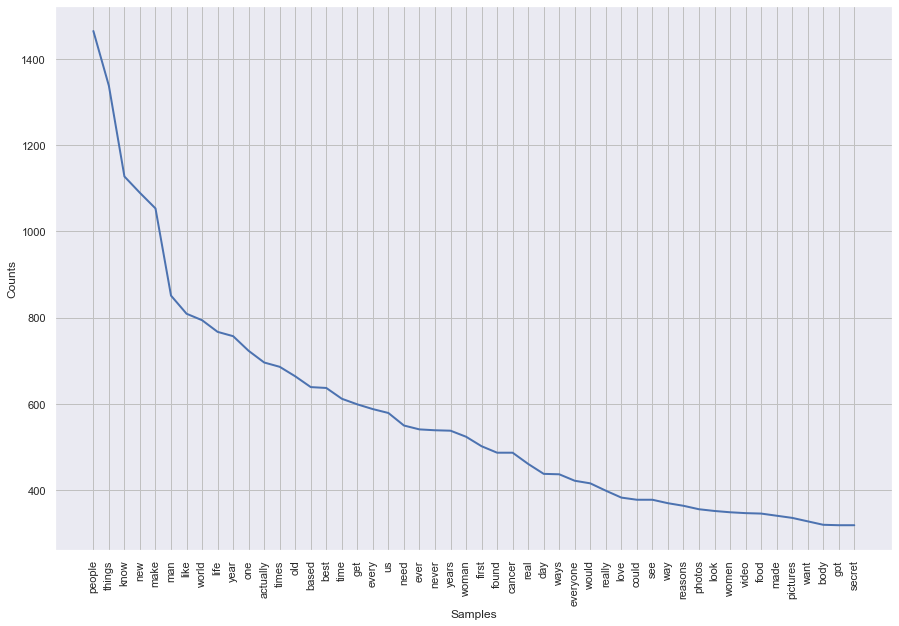

In [454]:
plt.figure(figsize=(15,10))
cb_nn_fdist.plot(50)

In [455]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [456]:
lemmatized_cb_nn=[]
for w in nonnum_in_cb:
    lemmatized_cb_nn.append(lemmatizer.lemmatize(w))

In [457]:
lemmatized_cb_nn_fdist = FreqDist(lemmatized_cb_nn)

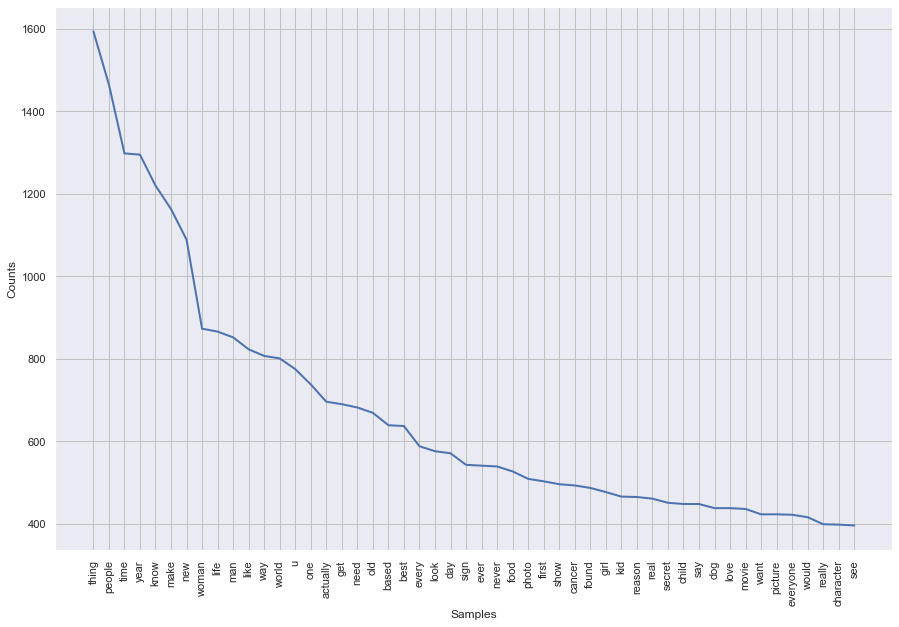

In [458]:
plt.figure(figsize=(15,10))
lemmatized_cb_nn_fdist.plot(50)

In [66]:
from nltk.probability import FreqDist

In [67]:
fdist = FreqDist(clean_flat_cb)

In [73]:
fdist.keys()

dict_keys(['get', 'bings', 'tv', 'female', 'friend', 'group', 'belong', 'new', 'star', 'wars', 'force', 'awakens', 'trailer', 'give', 'chills', 'vine', 'york', 'celebrity', 'big', 'brother', 'fucking', 'perfect', 'couple', 'stunning', 'photo', 'shoot', 'baby', 'learning', 'inoperable', 'brain', 'tumor', 'flirt', 'queer', 'girls', 'without', 'making', 'total', 'fool', '32', 'cute', 'things', 'distract', 'awkward', 'thanksgiving', 'disney', 'princesses', 'florida', 'quote', 'lyric', 'best', 'describes', 'depression', 'natalie', 'dormer', 'sam', 'claflin', 'play', 'game', 'see', 'actually', 'last', 'hunger', 'games', '16', 'responses', 'indian', 'patriarchy', '21', 'times', 'died', 'captain', 'america', 'civil', 'war', 'teaser', '17', 'kourtney', 'kardashian', 'shut', 'family', 'coffee', 'make', 'poop', 'ex', 'based', 'zodiac', 'hairdresser', 'struggles', 'every', 'black', 'girl', 'knows', 'true', 'walter', 'white', 'heisenberg', 'canadian', 'groom', 'ever', 'left', 'wedding', 'plow', 'gu

In [80]:
res = [i for i in fdist.keys() if i.isdigit()]
res

['32',
 '16',
 '21',
 '17',
 '15',
 '2016',
 '9',
 '8',
 '10',
 '6',
 '25',
 '29',
 '13',
 '23',
 '2015',
 '22',
 '100',
 '18',
 '27',
 '46',
 '58',
 '28',
 '19',
 '24',
 '42',
 '12',
 '20',
 '14',
 '11',
 '5',
 '1996',
 '31',
 '2',
 '7',
 '3',
 '2006',
 '33',
 '1955',
 '95',
 '4',
 '65',
 '51',
 '34',
 '80',
 '26',
 '38',
 '50',
 '53',
 '30',
 '36',
 '1915',
 '1',
 '37',
 '0',
 '93',
 '39',
 '108',
 '35',
 '40',
 '60',
 '41',
 '168',
 '500',
 '76',
 '2014',
 '72',
 '1989',
 '2019',
 '43',
 '2005',
 '48',
 '00',
 '45',
 '2008',
 '62',
 '49',
 '2003',
 '47',
 '2002',
 '89',
 '57',
 '55',
 '000',
 '44',
 '70',
 '2007',
 '59',
 '1995',
 '92',
 '90',
 '106',
 '61',
 '1994',
 '2018',
 '165',
 '69',
 '900',
 '101',
 '99',
 '90210',
 '2020',
 '103',
 '2010',
 '2009',
 '54',
 '98',
 '400',
 '2001',
 '78',
 '87',
 '82',
 '105',
 '56',
 '1983',
 '2011',
 '75',
 '155',
 '1975',
 '2017',
 '2004',
 '79',
 '495',
 '2024',
 '237',
 '1502',
 '2032',
 '300',
 '71',
 '97',
 '64',
 '85',
 '1921',
 '679',

In [82]:
cb_num_dist = {key: fdist[key] for key in res}

In [83]:
cb_num_dist

{'32': 49,
 '16': 256,
 '21': 645,
 '17': 676,
 '15': 350,
 '2016': 174,
 '9': 117,
 '8': 81,
 '10': 142,
 '6': 44,
 '25': 175,
 '29': 131,
 '13': 237,
 '23': 371,
 '2015': 506,
 '22': 268,
 '100': 58,
 '18': 353,
 '27': 212,
 '46': 7,
 '58': 3,
 '28': 65,
 '19': 583,
 '24': 226,
 '42': 20,
 '12': 172,
 '20': 125,
 '14': 169,
 '11': 177,
 '5': 71,
 '1996': 2,
 '31': 108,
 '2': 42,
 '7': 122,
 '3': 43,
 '2006': 13,
 '33': 45,
 '1955': 1,
 '95': 3,
 '4': 30,
 '65': 3,
 '51': 6,
 '34': 35,
 '80': 4,
 '26': 137,
 '38': 12,
 '50': 24,
 '53': 5,
 '30': 69,
 '36': 19,
 '1915': 1,
 '1': 33,
 '37': 25,
 '0': 2,
 '93': 1,
 '39': 26,
 '108': 1,
 '35': 22,
 '40': 13,
 '60': 4,
 '41': 17,
 '168': 1,
 '500': 6,
 '76': 3,
 '2014': 3,
 '72': 1,
 '1989': 16,
 '2019': 1,
 '43': 18,
 '2005': 12,
 '48': 8,
 '00': 2,
 '45': 11,
 '2008': 3,
 '62': 5,
 '49': 5,
 '2003': 1,
 '47': 8,
 '2002': 1,
 '89': 4,
 '57': 5,
 '55': 6,
 '000': 12,
 '44': 14,
 '70': 6,
 '2007': 7,
 '59': 7,
 '1995': 2,
 '92': 3,
 '90': 3

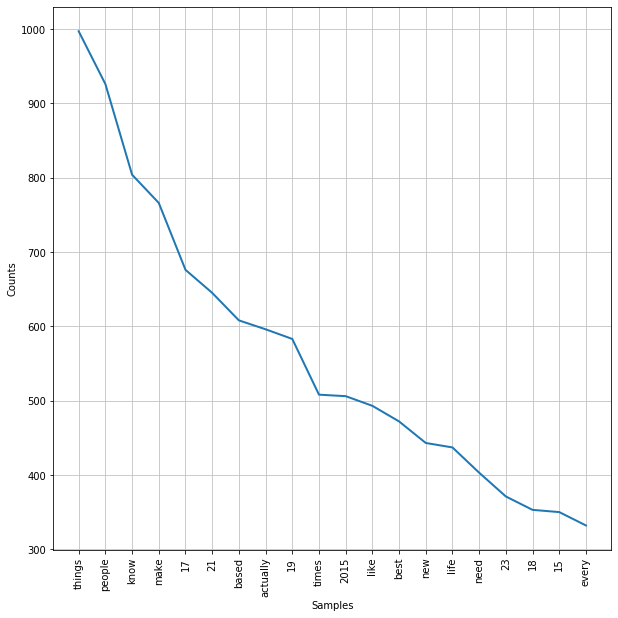

In [69]:
plt.figure(figsize=(10,10))
fdist.plot(20)

In [84]:
# making dictionary of non-digit words
new_dict = {key:val for key, val in fdist.items() if key != res} 

# Feature Engineering

Possible Features to include are:
- startswith() ===> numeric character
- contains ===> numbers, ?, !, ..., etc.
- number of words
- sentiment?

# EDA

In [142]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp36-cp36m-macosx_10_7_x86_64.whl size=159774 sha256=e5586f9e0f364b8067d50598b08da900eaf3470f32a75c8e7e2e73e1473e8dd1
  Stored in directory: /Users/taejoon/Library/Caches/pip/wheels/09/7a/57/49f0c5fb0d6aaee90cb8c2d13d09a909a7b0ce42f8805fe69a
Successfully built wordcloud


In [143]:
from wordcloud import WordCloud

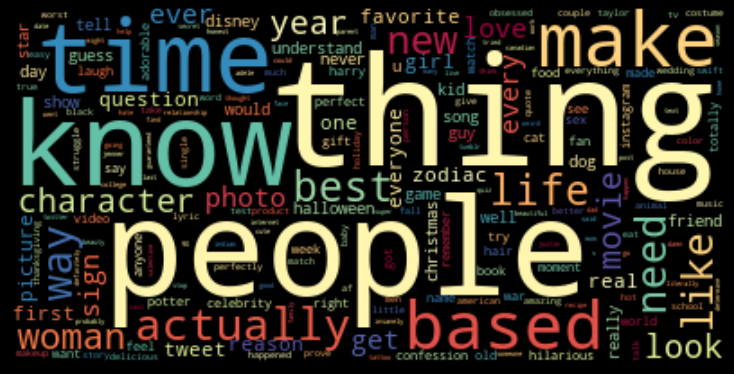

In [144]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(lemmatized_cb_nn_fdist)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

In [ ]:
# PLOT FEATURES
# create separate lists for keys and values

# Modelling

In [145]:
from sklearn.model_selection import train_test_split

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [393]:
preprocessed_data = data
preprocessed_data

,clickbait,headline,tokenized
0,1,"5 magical cyber gems that, when printed out an...","[5, magical, cyber, gems, that, when, printed,..."
1,1,with great art comes great sacrifice: 5 times ...,"[with, great, art, comes, great, sacrifice, 5,..."
2,1,the fact that these animals have killed people...,"[the, fact, that, these, animals, have, killed..."
3,1,"come and git it, boys! 6 hunky ranch hands who...","[come, and, git, it, boys, 6, hunky, ranch, ha..."
4,1,prioritizing self-care: this woman is enjoying...,"[prioritizing, self, care, this, woman, is, en..."
...,...,...,...
65361,0,"to make female hearts flutter in iraq, throw a...","[to, make, female, hearts, flutter, in, iraq, ..."
65362,0,"british liberal democrat patsy calton, 56, die...","[british, liberal, democrat, patsy, calton, 56..."
65363,0,drone smartphone app to help heart attack vict...,"[drone, smartphone, app, to, help, heart, atta..."
65364,0,"netanyahu urges pope benedict, in israel, to d...","[netanyahu, urges, pope, benedict, in, israel,..."


In [ ]:
# tokenized_data = data
# for i in range(len(data)):
#     tokenized_data['headline'][i] = tokenizer.tokenize(data['headline'][i])

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [164]:
data['headline']
preprocessed_data = [tokenizer.tokenize(list(data['headline'])[i]) for i in range(len(data))]
preprocessed_data
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

# tokenized_review = tokenizer.tokenize(review)

[['Should', 'I', 'Get', 'Bings'],
 ['Which', 'TV', 'Female', 'Friend', 'Group', 'Do', 'You', 'Belong', 'In'],
 ['The',
  'New',
  'Star',
  'Wars',
  'The',
  'Force',
  'Awakens',
  'Trailer',
  'Is',
  'Here',
  'To',
  'Give',
  'You',
  'Chills'],
 ['This',
  'Vine',
  'Of',
  'New',
  'York',
  'On',
  'Celebrity',
  'Big',
  'Brother',
  'Is',
  'Fucking',
  'Perfect'],
 ['A',
  'Couple',
  'Did',
  'A',
  'Stunning',
  'Photo',
  'Shoot',
  'With',
  'Their',
  'Baby',
  'After',
  'Learning',
  'She',
  'Had',
  'An',
  'Inoperable',
  'Brain',
  'Tumor'],
 ['How',
  'To',
  'Flirt',
  'With',
  'Queer',
  'Girls',
  'Without',
  'Making',
  'A',
  'Total',
  'Fool',
  'Of',
  'Yourself'],
 ['32',
  'Cute',
  'Things',
  'To',
  'Distract',
  'From',
  'Your',
  'Awkward',
  'Thanksgiving'],
 ['If', 'Disney', 'Princesses', 'Were', 'From', 'Florida'],
 ['What',
  's',
  'A',
  'Quote',
  'Or',
  'Lyric',
  'That',
  'Best',
  'Describes',
  'Your',
  'Depression'],
 ['Natalie',


In [ ]:
# Ecode

def tokenize(text):
    text = [word_tokenize(x) for x in text]
    return text

df.text = tokenize(df.text)

stopwords_list = stopwords.words('english')
df.text = df['text'].apply(lambda x: [item for item in x if item not in stopwords_list])

In [183]:
' '.join(X_train)

'should i get bings'

In [394]:
X_train, X_test, y_train, y_test = train_test_split(data['headline'], data['clickbait'], random_state=0)

tfidf = TfidfVectorizer(stop_words = stop_words, ngram_range = (1,2))

tfidf_text_train = tfidf.fit_transform(X_train)
tfidf_text_test = tfidf.transform(X_test)

In [395]:
tfidf_text_train

<49024x250600 sparse matrix of type '<class 'numpy.float64'>'
	with 620803 stored elements in Compressed Sparse Row format>

In [187]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score

In [211]:
recall_score(y_test, nb_test_preds)

0.9708396178984414

In [212]:
f1_score(y_test, nb_test_preds)

0.9642946317103621

In [188]:
#creating a function to call after each model iteration to print accuracy and recall scores for test and train
def train_results(preds):
    return "Training Accuracy:", accuracy_score(y_train,preds)," Training Recall:", recall_score(y_train,preds)

def test_results(preds):
    return "Testing Accuracy:", accuracy_score(y_test,preds)," Testing Recall:", recall_score(y_test,preds)

In [397]:
nb_classifier = MultinomialNB(alpha = .05)

nb_classifier.fit(tfidf_text_train, y_train)

nb_train_preds = nb_classifier.predict(tfidf_text_train)
nb_test_preds = nb_classifier.predict(tfidf_text_test)

print(train_results(nb_train_preds))
print(test_results(nb_test_preds))

('Training Accuracy:', 0.9989392950391645, ' Training Recall:', 0.9992267306987913)
('Testing Accuracy:', 0.9003181985069147, ' Testing Recall:', 0.9242778119237861)


In [196]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

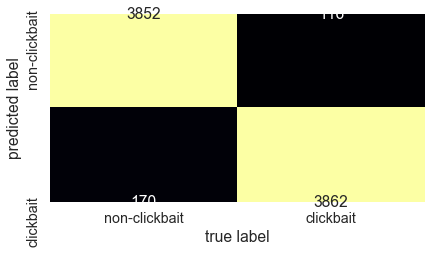

In [197]:
#confusion matrix on test set NB Classifier
sns.set()

cm_dc = confusion_matrix(y_test, nb_test_preds)
sns.set(font_scale=1.3)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.tight_layout()
plt.xlabel('true label')
plt.ylabel('predicted label')
# plt.savefig('nbcm5')
plt.show();

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [398]:
#rf_classifier = RandomForestClassifier(class_weight = 'balanced', n_estimators = 900 )
rf_classifier = RandomForestClassifier(class_weight = 'balanced')
rf_classifier.fit(tfidf_text_train, y_train)

rf_test_preds = rf_classifier.predict(tfidf_text_test)
rf_train_preds = rf_classifier.predict(tfidf_text_train)

print(train_results(rf_train_preds))
print(test_results(rf_test_preds))

('Training Accuracy:', 0.9999592036553525, ' Training Recall:', 0.9999186032314518)
('Testing Accuracy:', 0.8632970260678008, ' Testing Recall:', 0.8565457897971727)


In [ ]:
91, 94

In [200]:
from sklearn import svm
from sklearn.svm import LinearSVC

('Training Accuracy:', 0.9999796018276762, ' Training Recall:', 0.9999593016157259)
('Testing Accuracy:', 0.9020927671031698, ' Testing Recall:', 0.9259987707437001)


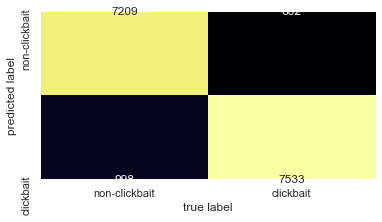

In [399]:
#SVM Model
#svm_classifier = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
svm_classifier = LinearSVC(class_weight='balanced', C=10, max_iter = 1500 )

svm_classifier.fit(tfidf_text_train, y_train)

svm_test_preds = svm_classifier.predict(tfidf_text_test)
svm_train_preds = svm_classifier.predict(tfidf_text_train)

print(train_results(svm_train_preds))
print(test_results(svm_test_preds))

#confusion matrix on test set SVM Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, svm_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
95, 95

('Training Accuracy:', 0.9999796018276762, ' Training Recall:', 0.9999593016157259)
('Testing Accuracy:', 0.9018479990209277, ' Testing Recall:', 0.925138291333743)


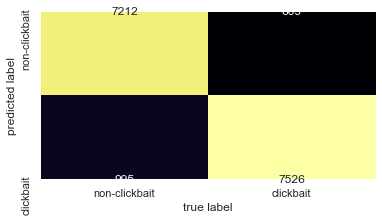

In [400]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=500, class_weight = 'balanced', solver = 'liblinear', tol=0.0001)

lr.fit(tfidf_text_train, y_train)

lr_train_preds = lr.predict(tfidf_text_train)
lr_test_preds = lr.predict(tfidf_text_test)

print(train_results(lr_train_preds))
print(test_results(lr_test_preds))

#confusion matrix on test set lr Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, lr_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
95,95

In [406]:
from sklearn.neighbors import KNeighborsClassifier

In [407]:
knn = KNeighborsClassifier()
knn.fit(tfidf_text_train, y_train)
y_test_predict = knn.predict(tfidf_text_test)
y_train_predict = knn.predict(tfidf_text_train)

In [408]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [409]:
cm_knn = confusion_matrix(y_test, y_test_predict)
cm_knn

array([[7274,  933],
       [1558, 6577]])

In [410]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     24453
           1       0.95      0.87      0.91     24571

    accuracy                           0.91     49024
   macro avg       0.91      0.91      0.91     49024
weighted avg       0.91      0.91      0.91     49024

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      8207
           1       0.88      0.81      0.84      8135

    accuracy                           0.85     16342
   macro avg       0.85      0.85      0.85     16342
weighted avg       0.85      0.85      0.85     16342



In [ ]:
92,92

In [411]:
tfidf_text_train

<49024x250600 sparse matrix of type '<class 'numpy.float64'>'
	with 620803 stored elements in Compressed Sparse Row format>

In [ ]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

In [215]:
import spacy
import pandas as pd
import numpy as np
from tqdm import tqdm

tqdm.pandas()

In [232]:
from scipy import sparse

In [216]:
nlp = spacy.load('en_core_web_sm')

In [401]:
spacy_data = data

In [402]:
spacy_data = data['headline'].progress_apply(lambda x: nlp(x))

100%|██████████| 65366/65366 [09:04<00:00, 120.01it/s]


In [403]:
spacy_df = pd.DataFrame(np.vstack([x.vector for x in spacy_data]))

In [404]:
sp_X_train, sp_X_test = train_test_split(spacy_df, random_state=0)
sp_tfidf_text_train = sparse.hstack([tfidf_text_train, sp_X_train]).tocsr()
sp_tfidf_text_test = sparse.hstack([tfidf_text_test, sp_X_test]).tocsr()

In [235]:
spacy_nb_classifier = MultinomialNB(alpha = .05)

spacy_nb_classifier.fit(sp_tfidf_text_train, y_train)

spacy_nb_train_preds = nb_classifier.predict(sp_tfidf_text_train)
spacy_nb_test_preds = nb_classifier.predict(sp_tfidf_text_test)

print(train_results(spacy_nb_train_preds))
print(test_results(spacy_nb_test_preds))

ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
# Cannot use negative values for Naive Bayes, so use for SVM

In [239]:
sp_tfidf_text_train

<24000x119141 sparse matrix of type '<class 'numpy.float64'>'
	with 2578770 stored elements in Compressed Sparse Row format>

('Training Accuracy:', 1.0, ' Training Recall:', 1.0)
('Testing Accuracy:', 0.9198996450862807, ' Testing Recall:', 0.93779963122311)


/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


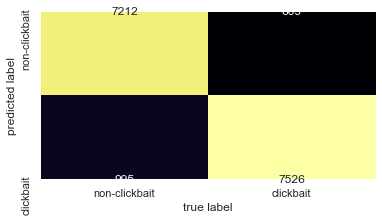

In [405]:
#SVM Model
#svm_classifier = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
spacy_svm_classifier = LinearSVC(class_weight='balanced', C=10, max_iter = 1500 )

spacy_svm_classifier.fit(sp_tfidf_text_train, y_train)

spacy_svm_test_preds = spacy_svm_classifier.predict(sp_tfidf_text_test)
spacy_svm_train_preds = spacy_svm_classifier.predict(sp_tfidf_text_train)

print(train_results(spacy_svm_train_preds))
print(test_results(spacy_svm_test_preds))

#confusion matrix on test set SVM Classifier 
sns.set()

cm_dc_sp = confusion_matrix(y_test, spacy_svm_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [421]:
f1_score(y_test, spacy_svm_test_preds)

0.9209875052815839

In [ ]:
98, 98